# RK Model 
- The model is an attempt to understand the influence of physical processes in cold regions. A 2-D transect along the Yakou catchement (Tibetan Plateau, Heihe river basin) is the field site.   
- The notebook describes the model configurations, prepares the dataset (if required), extracts the output and plots it. 

### Brief description:

**Goal – A scenario that sets the initial conditions to be cold (-3°C) with the hydrostatic head at - 1 m (Level of permafrost table or active layer), The top thermal boundary condition is the actual daily air temperature (2017) which is to check how the model performs under dynamic air temperature. To check for the influence of moisture, constant precipitation is considered from 150th - 300th day of the year (repeated all the 5 years). It can also be used as the intial conditions for the actual model** 

- T : 5 years (1825 days) - Daily time steps 
- Processes: Subsurface permafrost - flow, energy
- Mesh: Pseudo 1-D column with three layers - organic, mineral, and bedrock layer with increasing cell sizes.
- Initial conditions : -1.0 m – hydrostatic head (in m) to represent the permafrost table level or active layer, 264.15 K (-3°C).
- Boundary conditions :  Top - **Actual daily air temprature (2017) [The values are repeated for 5 years]**
- Boundary conditions : Top - **Constant precipitation = - 0.5e-07 m/s = - 0.002 mol/(m^2 s^1)** 

- Parameters:
    - VGc - Peat: alpha – 0.0005, n – 1.39, S_res = 0.05
    - VGc - Mineral & Bedrock: alpha – 2e-05, n – 1.58, S_res = 0.2
    - Thermal conductivity: Peat – L_dry – 0.07 W m^-1 K^-1, alpha_frozen = 1.0, alpha_unfrozen = 0.5
    - Thermal conductivity: Mineral & Bedrock – L_dry – 0.29 W m^-1 K^-1, alpha_frozen = 1.0, alpha_unfrozen = 0.5
    - Porosity, Compressible porosity: Peat – 0.85, 1e-07 Pa^-1; Mineral – 0.5, 1e-08 Pa^-1;
    - Permeability: Peat – 5e-11 m^2, Mineral & Bedrock – 2e-13 m^2 
    - Density: Peat – 700 kg/m^3, Mineral & Bedrock – 2170 kg/m^3

- Observations:
    - Temperature [K] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m, 20 m, 30 m, 40 m.
    - Saturation liquid [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.
    - Saturation ice [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.

- I/O files:
    - Xml file: Case1B_V.xml
    - Output folder (.demo file): Case1B_V.demo

- Expected results: Based on scenario III & IV, during the rain event, we will be observing an increase in moisture content within the subsurface. This increase will be in parallel with the thawing period. I would first expect the moisture content will rise in in the initial layers and then the increase will be seen at greater depths (probably after a delay). The heat associated with moisture will also increase the temperature within the subsurface. During this time period, probably we will be observing higher temperatures compared to scenario IV (without any precipitation). 

### Detailed description:

#### 1. Physical processes - Cases: Case 1
The physical processes that are considered - Subsurface flow + Subsurface energy (with ice content). A custom strong coupler - 'subsurface permafrost' couples the 'permafrost flow' and 'three-phase energy' PKs. 

<img src='../figures/Case1_process.jpg' width='500' height='500' alt='Case1 physical process' align='center' />  




#### 2. Mesh - Stages: Stage B
Two types of meshes are considered here. The first mesh (Yakou_column.exo) resembles the properties of the hillslope transect that we would like to simulate. Once the meshing issues are resolved, we will be using this mesh. The second mesh is a test mesh that was generated by the ATS developers with similar properties. We will be using this mesh. 

1. Yakou_column.exo - Organic layer (0.25 m), Mineral layer (0.25 - 20 m), Bedrock (20 – 40 m) with increasing cell thickness. [Cell thickness: 0.05 m until 0.25 m (Organic layer); 0.05 m until 0.25 m and increasing cell size by 2 units until 2 m, 2 m - 20 m, we have 2 m cell sizes (Mineral layer); we again have 2 m cell sizes from 20 m - 40 m]

2. tes_org_spinup_column.exo - Organic layer (0.385 m), Mineral layer (2.24 m), Bedrock (42.48 m); Cell thickness starts with a magnitude of 0.01 m and increases in magnitude of 1.2, 1.4 & 1.5 as cell numbers increase from 20, 20 - 26, and >26. 

##### Mesh - Run it with yakou_column.xml once the meshing issues has been resolved.  

Images of 'tes_org_spinup_column.exo':

<img src='../figures/1D_test_org_spinup_column_1.PNG' width='70' height='90' alt='1D_test_org_column_1' align='left' />  

<img src='../figures/1D_test_org_spinup_column_2.PNG' width='120' height='200' alt='1D_test_org_column_2' align='center' />  



#### 3. Scenarios (IC, BC): Scenario I


| :------:               | IC   |  BC    |                 
| :----------------------------------------------------------------- | :------: | :------: |  
| Hydraulic                                                          | Hydrostatic head (-1 m) | BCTopconstprep - Constant precipitation at definite time periods |
| Thermal                                                            |  265.15 K (-8 °C)   |  BCTopAirT = daily air temperature (2017) |

##### Time period (T) of 5 years (daily time step)


#### 4. Parameters:


|Sl. No.|	Parameter type|	Parameter|	Unit|	Soil type/Water	|Current value|
| --- | --- | --- | --- | --- | --- |
1 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha |	Pa^{-1} |	Peat |	0.0005 |
2 |	Variably saturated properties - van Genuchten model |	van Genuchten n |	[-] | Peat |		1.39
3 |	Variably saturated properties - van Genuchten model |	residual saturation	| [-] | Peat |		0.05
4 |	Variably saturated properties - van Genuchten model |	smoothing interval width 	| [saturation] | Peat |		0.05
5 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha	Pa^{-1} | Mineral |	0.0005
6 |	Variably saturated properties - van Genuchten model |	van Genuchten n	| [-]	| Mineral |		1.39
7 |	Variably saturated properties - van Genuchten model |	residual saturation	| [-]	| Mineral |		0.05
8 |	Variably saturated properties - van Genuchten model |	smoothing interval width  |	[saturation] | Mineral |			0.05
9 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha	| Pa^{-1}	| Bedrock |	2.00E-05
10 | Variably saturated properties - van Genuchten model |		van Genuchten n	| [-] | Bedrock |	1.58
11 | Variably saturated properties - van Genuchten model |		residual saturation	| [-]	| Bedrock |	0.2
12 | Variably saturated properties - van Genuchten model |		smoothing interval width 	| [saturation] | Bedrock |		0.05
13 | 	Permafrost model parameters - fpd permafrost model [Cryosuction] |	minimum dsi_dpressure magnitude |	??	| For the entire model |	1.00E-12 |
14 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) | 	[W m^-1 K^-1] |	Peat |	0.67 |
15 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry 	| [W m^-1 K^-1] |	Peat |		0.07 |
16 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen	| [-]	 |	Peat |	1 |
17 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen	| [-]	|	Peat |	0.5 |
18 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) | 	[W m^-1 K^-1] |	Mineral |	1 |
19 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry | [W m^-1 K^-1] |	Mineral |		0.29 |
20 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen| [-] |	Mineral |		1 |
21 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen | [-] |	Mineral |		0.5 |
22 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) |	[W m^-1 K^-1] |	Bedrock |	1 |
23 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry 	| [W m^-1 K^-1] |	Bedrock |		0.29 |
24 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen	| [-]	 |	Bedrock |	1 |
25 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen	| [-] |	Bedrock |		0.5 |
39 |	Physical |	Base porosity |	[-] |	Peat |	0.85 |
40 |	Physical |	Base porosity |	[-]	 | Mineral |	0.5 |
41 |	Physical |	Base porosity | [-]	| bedrock	 | 0.5 |
42 |	Physical |	Pore compressibility	| [Pa^-1] |	Peat |	1.00E-07 |
43 |	Physical |	Pore compressibility	| [Pa^-1] |	Mineral |	1.00E-08 |
44 |	Physical |	Pore compressibility	| [Pa^-1] |	bedrock |	1.00E-08 |
45 |	Physical / Hydraulic |	Permeability	| m^2? |	Peat |	5.00E-11 |
46 |	Physical / Hydraulic |	Permeability	|m^2? |	Mineral |	2.00E-13 |
47 |	Physical / Hydraulic |	Permeability	| m^2? |	bedrock |	2.00E-13 |
48 |	Physical |	Density	| kg/m^3? |	Peat |	7.00E+02 |
49 | 	Physical |	Density	|kg/m^3? |	Mineral |	2.17E+03 |
50 |	Physical |	Density	|kg/m^3? |	bedrock |	2.17E+03 |

- The values of Bedrock are currently similar to that of Minerals. While conducting the parameter sensitivity analysis, the values will be changed.

#### 5. Visualization:

- The entire subsurface domain is visualized. 
- Cycles start period stop" - "{0,100,-1}". The unit is in days. Every 100 days, one observation instance of the entire column is dumped. T = 1825 days, therefore 20 instances are stored. 

#### 6. Observations:

- The variables under observation taken every day - {0.0,1.0,-1.0}: 

    - Temperature [K] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m, 20 m, 30 m, 40 m.
    - Saturation liquid [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.
    - Saturation ice [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.


#### I/O files:

- Xml file: **Case1B_V.xml
- Dataset: Air temperature at 5 m prepared in the notebook - /home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/**AWS_final_metdata_2015_20.ipynb**
- Output folder (.demo file): **Case1B_V.demo**

#### Errors:
1. The model did not run after the time period = 152 days
    - Inference: It might be that the soil is saturated and there is no outflow in the model due to which there is a convergence issue! 

## Workflow:
1. Importing all the modules
2. Plotting the input data 
3. Checking the errors with the observation results


### 1. Importing all the modules

In [26]:
%matplotlib inline
import sys,os

sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
#sys.path.append(os.path.join('/home/rk/ats_rk/amanzi/src/physics/ats/tools/utils'))
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import h5py
import pandas as pd
from datetime import datetime

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import os
print(os.getcwd())

/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B


In [29]:
# Output directory name & input xml file name:
file_name = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B/Case1_B_V.demo'
input_filename = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B/Case1_B_V.xml'
### Reading the observation files:
file_observation = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B/Case1_B_V.demo/observation.dat'
file_obs_name = 'Case1_B_V.dat'
# Filename measurements: (Always give the relative path and not a absolute path)
filename_measurements = '../Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx'

### 2. Plotting the input data

In [30]:
input_data_file_name = 'Data/Yakou_data_constprep_5yrs.h5'

In [31]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'{input_data_file_name}','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    air_temp_2017_5yrs = np.array(hdf.get('air temperature [K]'))
    prep_2017_5yrs = np.array(hdf.get('precipitation rain [m s^-1]'))
    #print(air_temp_2017_5yrs)

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation snow [m SWE s^-1]', 'time [s]']




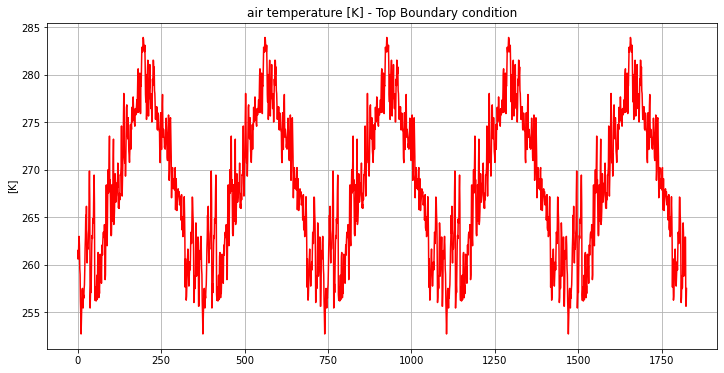

In [32]:
plt.figure(figsize=(12, 6))
plt.title('air temperature [K] - Top Boundary condition')
plt.plot(air_temp_2017_5yrs, 'r',label='air temperature [K]')
plt.ylabel('[K]')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
plt.grid(True)

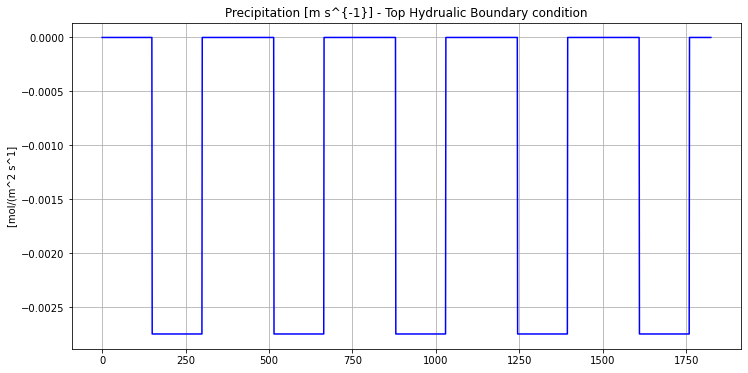

In [33]:
plt.figure(figsize=(12, 6))
plt.title('Precipitation [m s^{-1}] - Top Hydrualic Boundary condition')
plt.plot(prep_2017_5yrs, 'b')
plt.ylabel('[mol/(m^2 s^1]')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
plt.grid(True)

### 3. Checking the errors with observation results:

In [34]:
file_observation

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B/Case1_B_V.demo/observation.dat'

In [35]:
file_obs_name

'Case1_B_V.dat'

In [36]:
# Removing the hash lines in the intial part of the script
# https://stackoverflow.com/questions/11968998/remove-lines-that-contain-certain-string
remove_hashs = ['#']

# Opening the observation.dat file, 
# removing the lines with a hash and storing it in a new file - observation_2.dat
with open(f'{file_observation}') as oldfile, open(f'{file_obs_name}', 'w') as newfile:
    for line in oldfile:
        if not any(remove_hash in line for remove_hash in remove_hashs):
            newfile.write(line)

In [37]:
# Reading the csv file 
df_observation = pd.read_csv(f'{file_obs_name}',sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],water content [mol],point -0.01 temperature [K],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],...,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,1.174585e+06,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,265.150000,...,0.863441,0.772115,0.772931,0.774190,0.775791,0.776224,0.776224,0.776225,0.776225,0.0
1.0,86400.0,1.174585e+06,260.668072,260.980509,261.725722,262.822572,264.063654,264.902121,265.101848,265.145622,...,0.867149,0.776762,0.776359,0.775964,0.776229,0.776307,0.776232,0.776225,0.776225,1.0
2.0,172800.0,1.174585e+06,260.813451,260.998833,261.466536,262.244153,263.354811,264.478433,264.936207,265.112414,...,0.867137,0.777024,0.777026,0.776949,0.776930,0.776584,0.776289,0.776225,0.776225,2.0
3.0,259200.0,1.174585e+06,262.331194,262.344960,262.427383,262.687484,263.285120,264.208206,264.759645,265.056602,...,0.866183,0.776005,0.776520,0.777040,0.777350,0.776871,0.776384,0.776225,0.776225,3.0
4.0,345600.0,1.174585e+06,262.996234,262.992006,263.005606,263.102749,263.420242,264.088069,264.618435,264.989571,...,0.865655,0.775320,0.776015,0.776863,0.777530,0.777093,0.776496,0.776225,0.776225,4.0


#### Plotting the values 
##### 1. Subsurface temperature

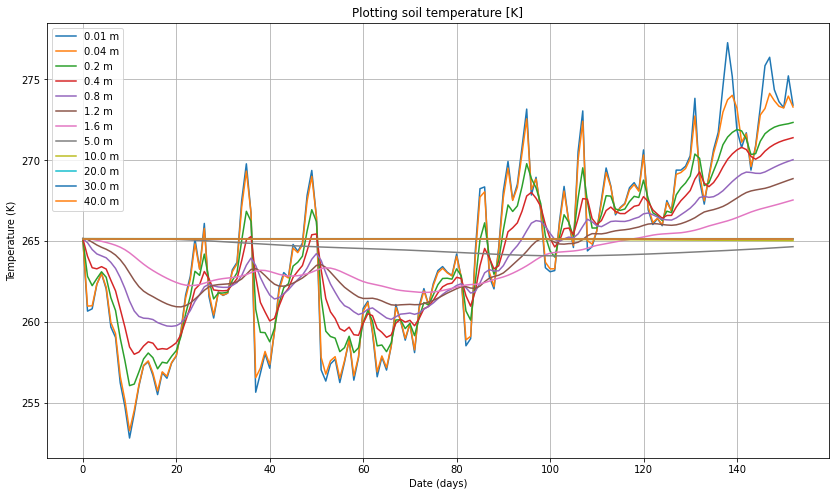

In [38]:
plt.figure(figsize=(14,8))
plt.title('Plotting soil temperature [K]')
#plt.plot(air_temp_2017_5yrs, 'r',label='air temperature [K]')
plt.plot(df_observation['point -0.01 temperature [K]'],label='0.01 m')
plt.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
plt.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
plt.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
plt.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
plt.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
plt.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
plt.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
plt.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
plt.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
plt.plot(df_observation['point -30.0 temperature [K]'],label='30.0 m')
plt.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

##### 2. Saturation of liquid

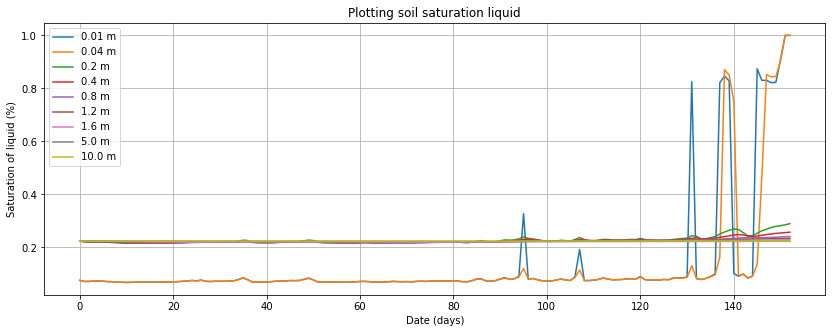

In [39]:
plt.figure(figsize=(14,5))
plt.title('Plotting soil saturation liquid')
plt.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
plt.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
plt.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
plt.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
plt.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
plt.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
plt.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
plt.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
plt.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')

plt.ylabel('Saturation of liquid (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

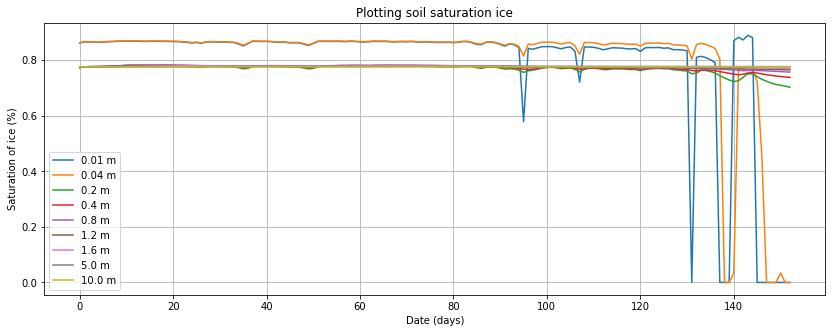

In [18]:
plt.figure(figsize=(14,5))
plt.title('Plotting soil saturation ice')
plt.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
plt.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
plt.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
plt.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
plt.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
plt.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
plt.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
plt.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
plt.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

plt.ylabel('Saturation of ice (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

### Plotting temperature, saturation of liquid, and saturation of ice

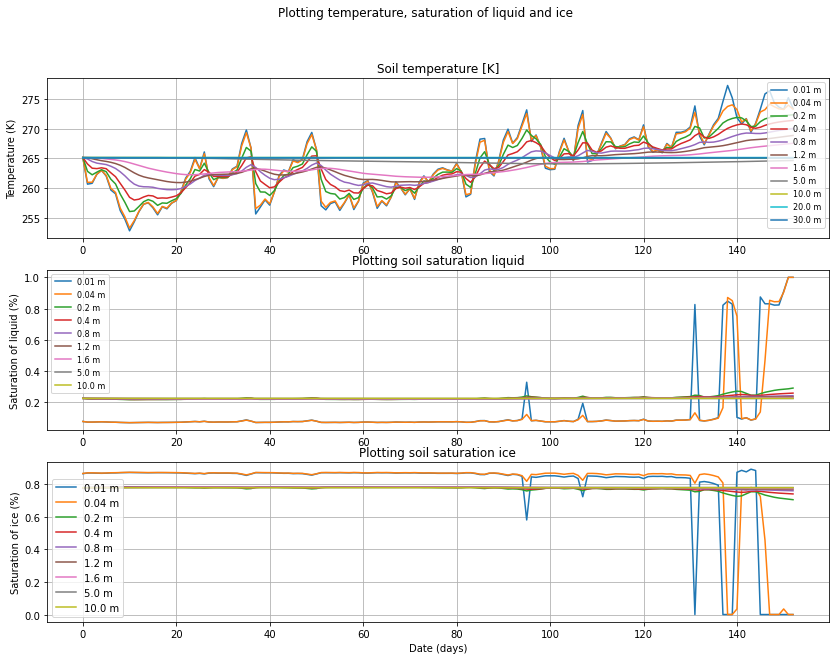

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(w=14,h=10)
fig.suptitle('Plotting temperature, saturation of liquid and ice')

ax1.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'r',label='air temperature [K]')
ax1.plot(df_observation['point -0.01 temperature [K]'],label='0.01 m')
ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
ax1.plot(df_observation['point -30.0 temperature [K]'],label='30.0 m')
#ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')
ax2.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

### Comments:
- Clearly the the model cannot interpret the the influence of precipitation after T  = 152 days since the saturation of liquid = 1.0 and cannot exceed further [Total saturation = s_l + s_g + s_i = 1]. The natural behaviour of water close to the surface is that it either generates surface runoff or creates subsurface runoff [lateral flow]. 
- Possible ways to deal with this error is:
    - Enable the interactions with the surface to generate subsurface runoff. - Need to couple surface and subsurface processes (can use permafrost_column.xml script)
    - Create a boundary condition on the right such that lateral flow can take place - A seepage face. Similar to 02_richards/seepage_infiltration.xml
    - Or reduce the precipitation intensity by a significant factor - Does not represent the actual precipitation in the area! 
    - It could also be that the surface has higher porosity and hence reaches saturation at a faster pace - Hence we can also change it's physical/hydraulic properties which would allow slower saturation.
    - Reduce the initial hydraulic head to allow water to slowly fill-up the column
    - Maybe the scenario of constant precipitation is unrealistic and considering the actual precipitation might yield better results?